## Data Analysis Project

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

### Load and Explore Dataset

In [5]:
df=pd.read_csv('data.csv')
df.shape
df.columns

# df.info()
# df.describe()
# df.isnull().sum()



Index(['InvoiceID', 'CustomerID', 'Gender', 'Age', 'City', 'ProductCategory',
       'Quantity', 'UnitPrice', 'TotalAmount', 'PurchaseDate',
       'PaymentMethod'],
      dtype='object')

### Data Cleaning

In [6]:
# Convert date to date and time format
# df['PurchaseDate']=pd.to_datetime(df['PurchaseDate'])

#Remove Dupicates
df=df.drop_duplicates()
# df.info()

#Replace values
df["Gender"]=df["Gender"].replace("Unknown","Others")
df["Quantity"]=df["Quantity"].replace("five",5)
df=df.replace('??',np.nan)

# Remove NaN
df=df.dropna()

# Change Dtype
df["InvoiceID"]=df["InvoiceID"].astype('i')
df["CustomerID"]=df["CustomerID"].astype('i')
df["Age"]=df["Age"].astype('i')
df["TotalAmount"]=df["TotalAmount"].astype('i')
df.head(100)

,InvoiceID,CustomerID,Gender,Age,City,ProductCategory,Quantity,UnitPrice,TotalAmount,PurchaseDate,PaymentMethod
0,10001,2102,Female,47,Urban,Home Decor,4,1037,4148,00:00.0,UPI
1,10002,2435,Male,56,Metro,Beauty,4,4058,16232,30:25.3,Cash
2,10003,2860,Male,44,Metro,Grocery,3,3248,9744,00:50.5,UPI
3,10004,2270,Female,53,Urban,Grocery,2,4840,9680,31:15.8,UPI
4,10005,2106,Male,46,Rural,Beauty,5,2574,12870,01:41.0,Wallet
...,...,...,...,...,...,...,...,...,...,...,...
99,10100,2729,Female,58,Urban,Home Decor,2,3678,7356,11:39.8,Card
101,10102,2161,Female,42,Rural,Home Decor,5,3289,16445,12:30.3,Cash
102,10103,2201,Female,43,Urban,Beauty,4,3741,14964,42:55.6,UPI
103,10104,2957,Female,28,Urban,Electronics,4,68,272,13:20.8,Cash


### Feature Engineering

In [7]:
# Create Age Group

df['Age_Group']=pd.cut(df["Age"],bins=[0,18,25,50,65],labels=["Child","Young-Adult","Adult","Senior"])
df.head

<bound method NDFrame.head of      InvoiceID  CustomerID  Gender  Age   City ProductCategory Quantity  \
0        10001        2102  Female   47  Urban      Home Decor        4   
1        10002        2435    Male   56  Metro          Beauty        4   
2        10003        2860    Male   44  Metro         Grocery        3   
3        10004        2270  Female   53  Urban         Grocery        2   
4        10005        2106    Male   46  Rural          Beauty        5   
..         ...         ...     ...  ...    ...             ...      ...   
495      10496        2017  Female   60  Rural     Electronics        3   
496      10497        2792  Female   51  Urban         Grocery        1   
497      10498        2734    Male   43  Rural         Grocery        4   
498      10499        2565  Female   58  Urban         Grocery        3   
499      10500        2569  Female   20  Rural      Home Decor        4   

    UnitPrice  TotalAmount PurchaseDate PaymentMethod    Age_Group  


### EDA(Exploratory Data Analysis)

Revenue By Catagory

In [8]:
Category_sales=df.groupby("ProductCategory")["TotalAmount"].sum().reset_index()
Category_sales

,ProductCategory,TotalAmount
0,Beauty,798334
1,Clothing,525611
2,Electronics,833901
3,Grocery,860425
4,Home Decor,777032


Top Cities

In [9]:
top_Cities=df.groupby("City")["TotalAmount"].sum().sort_values(ascending=False).head(5).reset_index()
top_Cities

,City,TotalAmount
0,Metro,1277081
1,Rural,1275143
2,Urban,1243079


Genders 

In [10]:
# gender_order=df['Gender'].value_counts()

gender_order=df.groupby("City")['Gender'].value_counts()
gender_order


City   Gender
Metro  Female    80
       Male      74
       Others    10
Rural  Female    72
       Male      72
       Others    11
Urban  Female    81
       Male      75
       Others     6
Name: count, dtype: int64

## Visualizaton


### Bar Chart (Revenue by category)

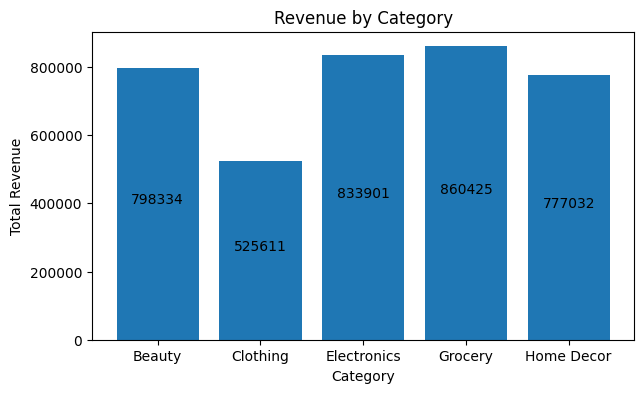

In [ ]:
def add_label(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]//2,y[i],ha='center')

plt.figure(figsize=(7,4))
plt.bar(Category_sales["ProductCategory"],Category_sales["TotalAmount"])
add_label(Category_sales["ProductCategory"],Category_sales["TotalAmount"])
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()

### pie chart(payment mode share)

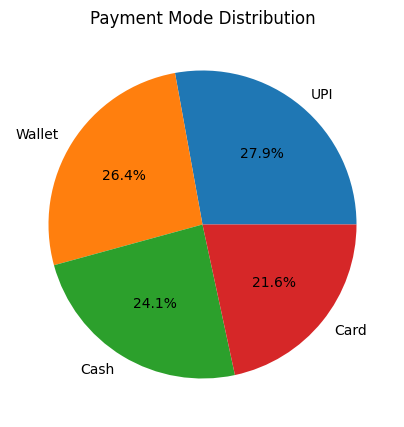

In [33]:
plt.figure(figsize=(5,5))
plt.pie(df['PaymentMethod'].value_counts(),labels=df["PaymentMethod"].value_counts().index,autopct="%1.1f%%")
plt.title("Payment Mode Distribution")
plt.show()

### Histogram(Customer Age)

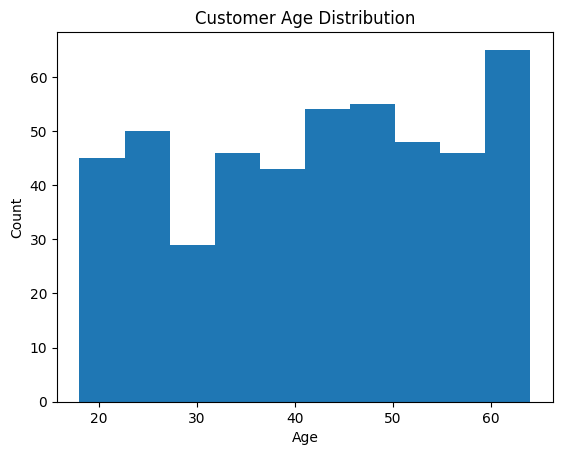

In [41]:
plt.hist(df['Age'],bins=10)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()